In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ercot_2023 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2023 3.xlsx')
ercot_2022 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2022.xlsx')
ercot_2021 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2021.xlsx')
ercot_2020 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2020.xlsx')
ercot_2019 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2019.xlsx')
ercot_2018 = pd.read_excel('/Users/amrithkumaar/Downloads/Native_Load_2018.xlsx')

In [3]:
#2021-2023 had different Hourending column names
ercot_2021 = ercot_2021.rename(columns = {'Hour Ending' : 'HourEnding'})
ercot_2022 = ercot_2022.rename(columns = {'Hour Ending' : 'HourEnding'})
ercot_2023 = ercot_2023.rename(columns = {'Hour Ending' : 'HourEnding'})


In [4]:
ercot_2023

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,01/01/2023 01:00,8514.637876,1218.506271,5073.526557,917.394049,9896.757586,2859.017922,6012.400469,1116.933155,35609.173887
1,01/01/2023 02:00,8345.632899,1179.885576,5016.774637,906.854582,9675.869720,2845.779210,5934.084260,1107.417972,35012.298856
2,01/01/2023 03:00,8125.706879,1151.144653,5016.303220,894.817013,9490.332365,2734.163642,5855.790279,1101.324245,34369.582295
3,01/01/2023 04:00,7995.083655,1153.306928,5038.003823,891.733538,9420.890470,2555.339795,5840.914307,1105.457821,34000.730337
4,01/01/2023 05:00,7906.920393,1168.779618,4994.502755,896.893843,9430.780728,2484.777679,5873.683697,1108.739956,33865.078669
...,...,...,...,...,...,...,...,...,...,...
8755,12/31/2023 20:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
8756,12/31/2023 21:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
8757,12/31/2023 22:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
8758,12/31/2023 23:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [5]:
full_load = pd.concat([ercot_2023, ercot_2022, ercot_2021, ercot_2020, ercot_2019, ercot_2018], ignore_index=True)
full_load['HourEnding'] = full_load['HourEnding'].str.replace('24:00', '23:59')
full_load['HourEnding'] = full_load['HourEnding'].str.replace(' DST', '')
full_load.loc[16776, 'HourEnding'] = '12/01/2022 01:00'
full_load.HourEnding = pd.to_datetime(full_load.HourEnding)
full_load = full_load.sort_values(by = 'HourEnding')
full_load = full_load.reset_index()
full_load = full_load.drop(columns = ['index'])
full_load

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [7]:
weather_COAST = pd.read_csv('/Users/amrithkumaar/Downloads/Houston_weather(COAST).csv')
weather_EAST = pd.read_csv('/Users/amrithkumaar/Downloads/Tyler_weather(EAST).csv')
weather_FWEST = pd.read_csv('/Users/amrithkumaar/Downloads/Midland_weather(FWEST).csv')
weather_NORTH = pd.read_csv('/Users/amrithkumaar/Downloads/WichitaFalls_weather(NORTH).csv')

In [8]:
weather_COAST = pd.read_csv('/Users/amrithkumaar/Downloads/Houston_weather(COAST).csv')

weather_COAST.date = pd.to_datetime(weather_COAST.date)
weather_COAST = weather_COAST.drop(columns = ['Unnamed: 0'])

weather_EAST.date = pd.to_datetime(weather_EAST.date)
weather_EAST = weather_EAST.drop(columns = ['Unnamed: 0'])

weather_FWEST.date = pd.to_datetime(weather_FWEST.date)
weather_FWEST = weather_FWEST.drop(columns = ['Unnamed: 0'])

weather_NORTH.date = pd.to_datetime(weather_NORTH.date)
weather_NORTH = weather_NORTH.drop(columns = ['Unnamed: 0'])

In [9]:
weather_COAST

,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,wind_speed_10m,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm
0,2018-01-01 00:00:00,46.951702,65.44908,37.959050,0.0,0.0,0.0,0.0,22.197730,31.722921,37.800000,51.541702,54.961700,60.091700,70.711700
1,2018-01-01 01:00:00,45.961700,65.32586,36.820915,0.0,0.0,0.0,0.0,22.104116,31.973190,36.000000,51.181700,54.871700,60.091700,70.711700
2,2018-01-01 02:00:00,44.791700,64.94546,34.773716,0.0,0.0,0.0,0.0,24.640940,35.623630,38.880000,50.641700,54.691700,60.091700,70.711700
3,2018-01-01 03:00:00,43.081700,60.40363,32.339966,0.0,0.0,0.0,0.0,25.387020,36.204617,41.039997,50.101700,54.511700,60.091700,70.711700
4,2018-01-01 04:00:00,40.561700,59.83284,29.098309,0.0,0.0,0.0,0.0,26.758923,38.385185,44.280000,49.291702,54.331700,60.091700,70.711700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,69.091705,58.00964,66.882830,0.0,0.0,0.0,0.0,14.982228,19.083395,27.359999,61.801700,53.071700,61.981697,73.591705
52580,2023-12-31 20:00:00,70.171700,53.03177,66.505960,0.0,0.0,0.0,0.0,16.610792,21.485697,30.239998,63.691704,53.791702,61.981697,73.591705
52581,2023-12-31 21:00:00,70.621704,48.70237,66.400010,0.0,0.0,0.0,0.0,16.583460,21.734581,29.160000,64.411700,54.421700,61.981697,73.591705
52582,2023-12-31 22:00:00,70.261700,50.46741,67.408920,0.0,0.0,0.0,0.0,12.069400,18.792551,27.720000,64.231700,55.141700,61.891700,73.591705


In [108]:
#IM DOING COAST EAST FWEST NORTH


In [9]:
COAST: Houston, 
EAST: Tyler,
FWEST: Midland, 
NORTH: Wichita Falls

SyntaxError: invalid syntax (3251355896.py, line 1)

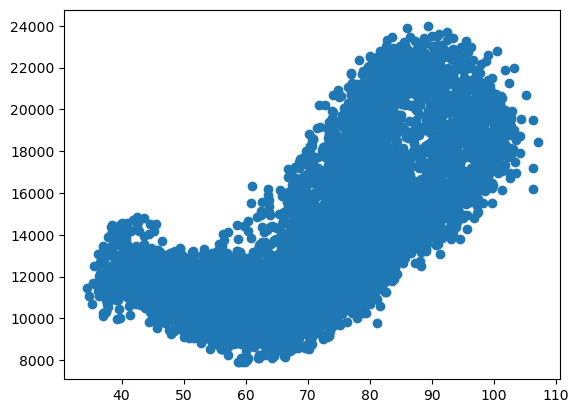

In [10]:
#COAST:
full_load
weather_COAST

plt.plot(weather_COAST[weather_COAST['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 


(array([  83.,  224.,  433.,  751.,  854.,  928., 1054., 1249., 1666.,
        1518.]),
 array([ 22.442236 ,  30.1980124,  37.9537888,  45.7095652,  53.4653416,
         61.221118 ,  68.9768944,  76.7326708,  84.4884472,  92.2442236,
        100.       ]),
 <BarContainer object of 10 artists>)

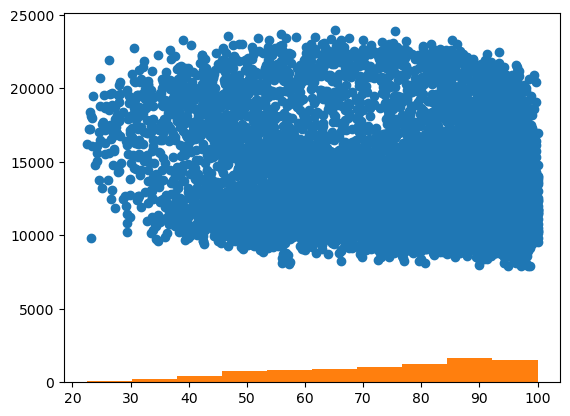

In [11]:
plt.plot(weather_COAST[weather_COAST['date'].dt.year == 2023].relative_humidity_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 

plt.hist(weather_COAST[weather_COAST['date'].dt.year == 2023].relative_humidity_2m) 

(array([7.510e+02, 2.700e+03, 2.529e+03, 1.664e+03, 7.330e+02, 3.020e+02,
        7.100e+01, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.       ,  5.0566864, 10.1133728, 15.1700592, 20.2267456,
        25.283432 , 30.3401184, 35.3968048, 40.4534912, 45.5101776,
        50.566864 ]),
 <BarContainer object of 10 artists>)

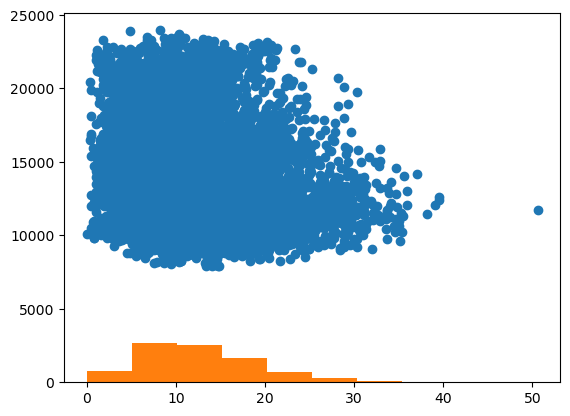

In [12]:
plt.plot(weather_COAST[weather_COAST['date'].dt.year == 2023].wind_speed_10m,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 
plt.hist(weather_COAST[weather_COAST['date'].dt.year == 2023].wind_speed_10m) 

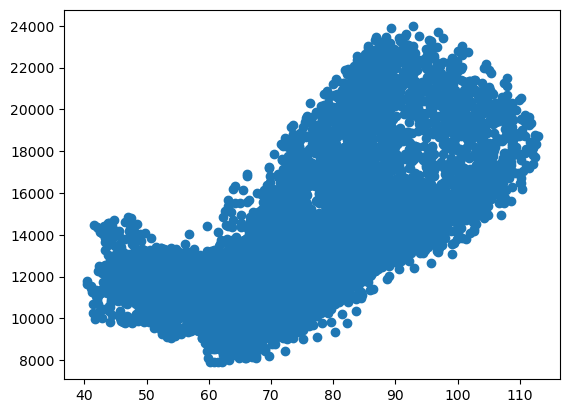

In [13]:
plt.plot(weather_COAST[weather_COAST['date'].dt.year == 2023].soil_temperature_0_to_7cm,
         full_load[full_load['HourEnding'].dt.year == 2023].COAST,'o') 

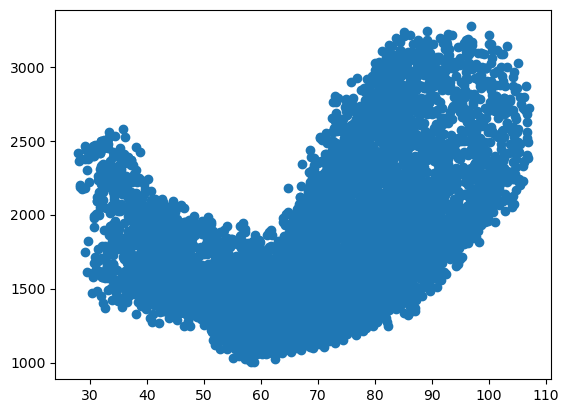

In [14]:
#EAST

plt.plot(weather_EAST[weather_EAST['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].EAST, 
          'o')

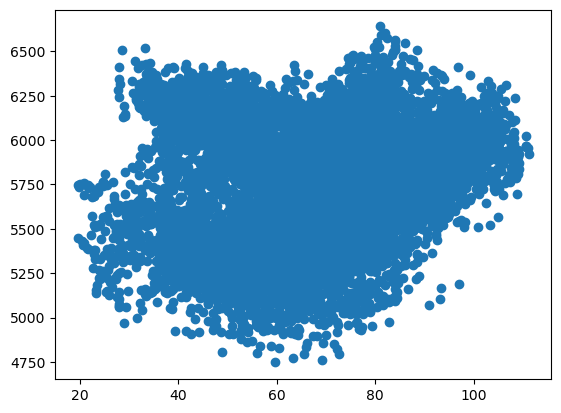

In [15]:
#FWEST

plt.plot(weather_FWEST[weather_FWEST['date'].dt.year == 2023].temperature_2m,
    full_load[full_load['HourEnding'].dt.year == 2023].FWEST, 
          'o')

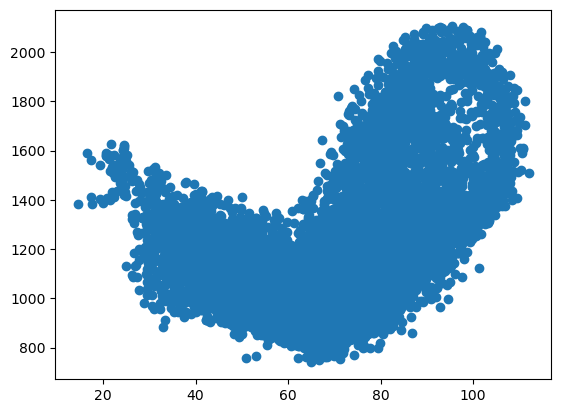

In [16]:
#NORTH
plt.plot(weather_NORTH[weather_NORTH['date'].dt.year == 2023].temperature_2m,
         full_load[full_load['HourEnding'].dt.year == 2023].NORTH, 
          'o')

In [17]:
full_load

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [18]:
full_load[full_load['HourEnding'].dt.year == 2023]

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT
43824,2023-01-01 01:00:00,8514.637876,1218.506271,5073.526557,917.394049,9896.757586,2859.017922,6012.400469,1116.933155,35609.173887
43825,2023-01-01 02:00:00,8345.632899,1179.885576,5016.774637,906.854582,9675.869720,2845.779210,5934.084260,1107.417972,35012.298856
43826,2023-01-01 03:00:00,8125.706879,1151.144653,5016.303220,894.817013,9490.332365,2734.163642,5855.790279,1101.324245,34369.582295
43827,2023-01-01 04:00:00,7995.083655,1153.306928,5038.003823,891.733538,9420.890470,2555.339795,5840.914307,1105.457821,34000.730337
43828,2023-01-01 05:00:00,7906.920393,1168.779618,4994.502755,896.893843,9430.780728,2484.777679,5873.683697,1108.739956,33865.078669
...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370


In [19]:
full_load.dtypes

HourEnding    datetime64[ns]
COAST                float64
EAST                 float64
FWEST                float64
NORTH                float64
NCENT                float64
SOUTH                float64
SCENT                float64
WEST                 float64
ERCOT                float64
dtype: object

In [ ]:
##############################################################################################################################

#TIME RELATED VARIABLE GENERATION BELOW: 

##############################################################################################################################

In [20]:
def get_season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(year=year, month=12, day=1), pd.Timestamp(year=year, month=12, day=31)),
        'Winter': (pd.Timestamp(year=year, month=1, day=1), pd.Timestamp(year=year, month=3, day=20)),
        'Spring': (pd.Timestamp(year=year, month=3, day=21), pd.Timestamp(year=year, month=6, day=20)),
        'Summer': (pd.Timestamp(year=year, month=6, day=21), pd.Timestamp(year=year, month=9, day=20)),
        'Fall': (pd.Timestamp(year=year, month=9, day=21), pd.Timestamp(year=year, month=12, day=20))
    }
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter' # Default to Winter

# Apply the function to create a 'Season' column
full_load['Season'] = full_load['HourEnding'].apply(get_season)

In [21]:
full_load[full_load['Season'] == 'Spring']

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,Season
1895,2018-03-21 01:00:00,8749.116619,1128.505494,2447.669764,652.919900,9158.741424,2560.085478,4395.856359,927.738709,30020.633747,Spring
1896,2018-03-21 02:00:00,8451.093609,1100.402943,2428.523332,643.867459,8915.096724,2405.638083,4213.996265,912.459788,29071.078203,Spring
1897,2018-03-21 03:00:00,8296.103630,1103.296658,2419.996064,646.270179,8869.195906,2322.067215,4127.072246,906.194237,28690.196134,Spring
1898,2018-03-21 04:00:00,8310.802764,1094.227626,2415.919716,658.528097,9009.550361,2305.902992,4116.057786,911.162102,28822.151444,Spring
1899,2018-03-21 05:00:00,8497.681535,1130.347086,2430.386142,682.041390,9407.709621,2327.443336,4231.932686,933.350698,29640.892493,Spring
...,...,...,...,...,...,...,...,...,...,...,...
47898,2023-06-19 20:00:00,20152.566387,2665.335097,5890.149774,1830.776435,24005.394222,6013.043894,13337.804689,1870.326221,75765.396719,Spring
47899,2023-06-19 21:00:00,19575.016940,2618.467784,5939.075706,1749.698319,23227.795766,5889.277731,12968.488457,1782.936676,73750.757378,Spring
47900,2023-06-19 22:00:00,18972.507045,2520.298684,5978.607011,1697.188013,22477.483774,5737.800777,12512.819769,1712.340704,71609.045776,Spring
47901,2023-06-19 23:00:00,18074.162209,2370.227720,6044.490938,1592.469264,21054.787782,5409.225970,11758.089749,1611.861187,67915.314820,Spring


In [22]:
full_load_w_season = pd.get_dummies(full_load, columns=['Season'], dtype = 'int')
full_load_w_season

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,0,0,0,1
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,0,0,0,1
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,0,0,0,1
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,0,0,0,1
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,0,0,0,1
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,0,0,0,1
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,0,0,0,1
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,0,0,0,1


In [23]:
full_load_w_season['month'] = full_load_w_season.HourEnding.dt.month
full_load_w_season

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,Season_Fall,Season_Spring,Season_Summer,Season_Winter,month
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,0,0,0,1,1
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,0,0,0,1,1
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,0,0,0,1,1
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,0,0,0,1,1
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,0,0,0,1,12
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,0,0,0,1,12
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,0,0,0,1,12
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,0,0,0,1,12


In [24]:
load_w_season_month = pd.get_dummies(full_load_w_season, columns=['month'], dtype = 'int')
load_w_season_month

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,0,0,0,0,1
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,0,0,0,1
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,0,0,1
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,0,0,1


In [39]:
##Now compile the holiday variables (Federal Holidays)
""""
New Year’s Day: January 1
Martin Luther King, Jr. Day: Third Monday of January
President’s Day (George Washington’s Birthday): Third Monday of February
Memorial Day: Last Monday in May
Juneteenth: June 19
Independence Day: July 4
Labor Day: First Monday in September
Indigenous Peoples’ Day (also observed as Columbus Day): Second Monday in October
Veterans Day: November 11
Thanksgiving Day: Fourth Thursday in November
Christmas Day: December 25


,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
7295,2018-11-01 01:00:00,9102.178303,1025.489866,2827.350800,641.177830,8857.957777,2751.985909,4478.713569,1010.602371,30695.456424,...,0,0,0,0,0,0,0,0,1,0
7296,2018-11-01 02:00:00,8772.215264,982.924084,2805.743026,630.175013,8525.755660,2581.735292,4246.897630,996.175232,29541.621199,...,0,0,0,0,0,0,0,0,1,0
7297,2018-11-01 03:00:00,8565.860283,951.793674,2811.368780,624.710519,8369.425828,2474.662162,4121.680918,989.489731,28908.991895,...,0,0,0,0,0,0,0,0,1,0
7298,2018-11-01 04:00:00,8479.355654,944.270161,2811.975378,624.743328,8389.897395,2379.320556,4088.730522,995.776125,28714.069119,...,0,0,0,0,0,0,0,0,1,0
7299,2018-11-01 05:00:00,8611.100530,967.960125,2822.560384,637.434722,8664.876527,2337.806786,4143.959596,1013.746351,29199.445021,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51835,2023-11-30 20:00:00,12416.398027,1638.985540,5975.386893,1129.314363,12933.984528,3823.252051,7435.240807,1219.216302,46571.778512,...,0,0,0,0,0,0,0,0,1,0
51836,2023-11-30 21:00:00,12197.533040,1608.155875,6002.244119,1163.163417,12647.654789,3756.640941,7263.762180,1203.021753,45842.176114,...,0,0,0,0,0,0,0,0,1,0
51837,2023-11-30 22:00:00,11961.548625,1554.880072,5973.889801,1140.662956,12266.395525,3651.543616,6992.399152,1185.282996,44726.602743,...,0,0,0,0,0,0,0,0,1,0
51838,2023-11-30 23:00:00,11537.741600,1455.206265,6028.517890,1105.216572,11436.879329,3515.324786,6609.452788,1140.145404,42828.484633,...,0,0,0,0,0,0,0,0,1,0


In [25]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
hol = cal.holidays(start=load_w_season_month.HourEnding.min(), end=load_w_season_month.HourEnding.max())
load_w_season_month['isHoliday'] = pd.to_datetime(load_w_season_month['HourEnding'].dt.date).isin(hol)


In [26]:
load_w_season_month['hour'] = load_w_season_month.HourEnding.dt.hour
load_w_season_month

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,isHoliday,hour
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,False,1
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,False,2
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,False,3
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,False,4
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,0,0,1,False,20
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,0,1,False,21
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,1,False,22
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,1,False,23


In [27]:
load_w_time_vars = pd.get_dummies(load_w_season_month, columns=['hour'], dtype = 'int')
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,0,1,0,0,0
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,0,1,0,0
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,0,1,0
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,0,0,1


In [28]:
load_w_time_vars['isHoliday'] = load_w_time_vars['isHoliday'].astype('int')
load_w_time_vars[load_w_time_vars['isHoliday']==1]

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
336,2018-01-15 01:00:00,10665.477919,1513.787125,2593.745441,863.627852,12804.147165,2683.875043,5836.485452,1188.515481,38149.661479,...,0,0,0,0,0,0,0,0,0,0
337,2018-01-15 02:00:00,10560.180576,1556.163118,2592.227257,864.264345,12672.430249,2622.485847,5825.351381,1194.413399,37887.516172,...,0,0,0,0,0,0,0,0,0,0
338,2018-01-15 03:00:00,10549.060511,1554.648446,2587.517984,876.164632,12678.971252,2598.407206,5881.938834,1208.107895,37934.816759,...,0,0,0,0,0,0,0,0,0,0
339,2018-01-15 04:00:00,10679.347426,1579.019873,2608.295102,895.131975,12891.505306,2622.087030,6019.500551,1235.049247,38529.936510,...,0,0,0,0,0,0,0,0,0,0
340,2018-01-15 05:00:00,10976.734663,1631.183890,2607.568002,920.166614,13420.817070,2689.651610,6274.448195,1273.330615,39793.900660,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52435,2023-12-25 20:00:00,11935.409574,1588.828586,6055.417967,1290.214984,13226.072503,3200.647100,7479.713730,1278.634582,46054.939027,...,0,0,0,0,0,0,1,0,0,0
52436,2023-12-25 21:00:00,11915.779925,1624.352497,6071.701747,1301.241813,13403.934307,3172.062809,7526.577079,1295.864161,46311.514338,...,0,0,0,0,0,0,0,1,0,0
52437,2023-12-25 22:00:00,11832.372786,1662.489749,6136.894124,1300.435130,13520.793751,3084.073207,7511.401552,1300.471537,46348.931836,...,0,0,0,0,0,0,0,0,1,0
52438,2023-12-25 23:00:00,11660.447429,1659.352183,6147.286492,1306.120063,13384.023150,3027.004317,7340.376916,1269.055497,45793.666046,...,0,0,0,0,0,0,0,0,0,1


In [29]:
load_w_time_vars['hour_24'] = load_w_time_vars['hour_22'].shift(2)
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,0,NaN
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,0,NaN
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,0,0.0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,0,0.0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,1,0,0,0,0.0
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,1,0,0,0.0
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,1,0,0.0
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,0,1,0.0


In [30]:
load_w_time_vars['hour_24'] = load_w_time_vars['hour_24'].fillna(0)
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,0,0.0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,0,0.0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,0,0.0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,0,0.0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,1,0,0,0,0.0
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,1,0,0,0.0
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,1,0,0.0
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,0,1,0.0


In [31]:
load_w_time_vars['hour_23'] = load_w_time_vars['hour_23']  - load_w_time_vars['hour_24']
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0,0.0,0.0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0,0.0,0.0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0,0.0,0.0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0,0.0,0.0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,0,1,0,0,0.0,0.0
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,0,1,0,0.0,0.0
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,0,1,0.0,0.0
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,0,1.0,0.0


In [37]:
#adding day of the week variables:
day_of_week = load_w_time_vars.HourEnding.dt.dayofweek
load_w_time_vars['day_of_week'] = day_of_week

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,day_of_week
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0,0,0,1,0,0,0.0,0.0,6
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0,0,0,0,1,0,0.0,0.0,6
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,0,0,0,0,0,0,1,0.0,0.0,6
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,0,0,0,0,0,0,1.0,0.0,6


In [38]:
load_w_time_vars = pd.get_dummies(load_w_time_vars, columns=['day_of_week'], dtype = 'int')
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_22,hour_23,hour_24,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0.0,0.0,1,0,0,0,0,0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0.0,0.0,1,0,0,0,0,0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0.0,0.0,1,0,0,0,0,0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0.0,0.0,1,0,0,0,0,0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0.0,0.0,0,0,0,0,0,0,1
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0.0,0.0,0,0,0,0,0,0,1
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,1,0.0,0.0,0,0,0,0,0,0,1
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,1.0,0.0,0,0,0,0,0,0,1


In [39]:
load_w_time_vars.to_csv('/Users/amrithkumaar/Downloads/load_w_time_vars_week.csv')

In [40]:
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_22,hour_23,hour_24,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0.0,0.0,1,0,0,0,0,0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0.0,0.0,1,0,0,0,0,0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0.0,0.0,1,0,0,0,0,0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0.0,0.0,1,0,0,0,0,0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0.0,0.0,0,0,0,0,0,0,1
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0.0,0.0,0,0,0,0,0,0,1
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,1,0.0,0.0,0,0,0,0,0,0,1
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,1.0,0.0,0,0,0,0,0,0,1


In [41]:
#transforming weather data for regression analysis:
weather_COAST = pd.read_csv('/Users/amrithkumaar/Downloads/Houston_weather(COAST).csv')
weather_COAST.date = pd.to_datetime(weather_COAST.date)
weather_COAST = weather_COAST.drop(columns = ['Unnamed: 0'])
weather_COAST = weather_COAST.drop(columns = ['snow_depth', 'soil_temperature_100_to_255cm',
                                              'snowfall', 'rain', 'wind_speed_10m', 'soil_temperature_7_to_28cm',
                                             'temperature_2m'])
weather_COAST['COAST_load'] = load_w_time_vars['COAST'].values

# # of times it rained in previous 7 days
weather_COAST.set_index('date', inplace=True)
weather_COAST['rained'] = weather_COAST['precipitation'] > 0
weather_COAST['percip_days_in_last_7'] = weather_COAST['rained'].rolling(window='7D').sum().shift(1)
weather_COAST.drop(columns=['rained'], inplace=True)
weather_COAST['percip_days_in_last_7'] = weather_COAST['percip_days_in_last_7'].fillna(0)

#3day avg of weather:
weather_COAST['avg_temp_last_3_days'] = weather_COAST['apparent_temperature'].rolling(window=3).mean()
weather_COAST['avg_temp_last_3_days'] = weather_COAST['avg_temp_last_3_days'].fillna(weather_COAST['apparent_temperature'])
weather_COAST

#number of hot days (temp is 1sd above)
mean_temp = weather_COAST['apparent_temperature'].mean()
std_temp = weather_COAST['apparent_temperature'].std()

weather_COAST['is_hot_day'] = weather_COAST['apparent_temperature'] > (mean_temp + std_temp)
weather_COAST['hot_days_last_7'] = weather_COAST['is_hot_day'].rolling(window=7).sum()
weather_COAST['hot_days_last_7'] = weather_COAST['hot_days_last_7'].fillna(0)
weather_COAST.drop(columns=['is_hot_day'], inplace=True)
weather_COAST

,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_28_to_100cm,COAST_load,percip_days_in_last_7,avg_temp_last_3_days,hot_days_last_7
date,,,,,,,,,,,
2018-01-01 00:00:00,65.44908,37.959050,0.0,31.722921,37.800000,51.541702,60.091700,11425.979115,0.0,37.959050,0.0
2018-01-01 01:00:00,65.32586,36.820915,0.0,31.973190,36.000000,51.181700,60.091700,11408.418023,0.0,36.820915,0.0
2018-01-01 02:00:00,64.94546,34.773716,0.0,35.623630,38.880000,50.641700,60.091700,11405.198365,0.0,36.517894,0.0
2018-01-01 03:00:00,60.40363,32.339966,0.0,36.204617,41.039997,50.101700,60.091700,11450.560138,0.0,34.644866,0.0
2018-01-01 04:00:00,59.83284,29.098309,0.0,38.385185,44.280000,49.291702,60.091700,11631.337459,0.0,32.070664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,58.00964,66.882830,0.0,19.083395,27.359999,61.801700,61.981697,11918.024426,2.0,65.483151,0.0
2023-12-31 20:00:00,53.03177,66.505960,0.0,21.485697,30.239998,63.691704,61.981697,11634.439863,1.0,66.725353,0.0
2023-12-31 21:00:00,48.70237,66.400010,0.0,21.734581,29.160000,64.411700,61.981697,11360.099483,1.0,66.596267,0.0


In [130]:
weather_COAST.to_csv('/Users/amrithkumaar/Downloads/Coast_w_new_feats.csv')

In [43]:
weather_COAST.columns

Index(['relative_humidity_2m', 'apparent_temperature', 'precipitation',
       'wind_speed_100m', 'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_28_to_100cm', 'COAST_load', 'percip_days_in_last_7',
       'avg_temp_last_3_days', 'hot_days_last_7'],
      dtype='object')

In [42]:
weather_COAST.corr()['COAST_load']

relative_humidity_2m           -0.041547
apparent_temperature            0.575876
precipitation                  -0.017705
wind_speed_100m                -0.284493
wind_gusts_10m                 -0.072081
soil_temperature_0_to_7cm       0.553775
soil_temperature_28_to_100cm    0.627707
COAST_load                      1.000000
percip_days_in_last_7          -0.027209
avg_temp_last_3_days            0.548162
hot_days_last_7                 0.389614
Name: COAST_load, dtype: float64

In [44]:
merged_df = load_w_time_vars.merge(weather_COAST, left_on = 'COAST', right_on = 'COAST_load')
merged_df

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_28_to_100cm,COAST_load,percip_days_in_last_7,avg_temp_last_3_days,hot_days_last_7
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,37.959050,0.0,31.722921,37.800000,51.541702,60.091700,11425.979115,0.0,37.959050,0.0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,36.820915,0.0,31.973190,36.000000,51.181700,60.091700,11408.418023,0.0,36.820915,0.0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,34.773716,0.0,35.623630,38.880000,50.641700,60.091700,11405.198365,0.0,36.517894,0.0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,32.339966,0.0,36.204617,41.039997,50.101700,60.091700,11450.560138,0.0,34.644866,0.0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,29.098309,0.0,38.385185,44.280000,49.291702,60.091700,11631.337459,0.0,32.070664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52583,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,66.882830,0.0,19.083395,27.359999,61.801700,61.981697,11918.024426,2.0,65.483151,0.0
52584,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,66.505960,0.0,21.485697,30.239998,63.691704,61.981697,11634.439863,1.0,66.725353,0.0
52585,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,66.400010,0.0,21.734581,29.160000,64.411700,61.981697,11360.099483,1.0,66.596267,0.0
52586,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,67.408920,0.0,18.792551,27.720000,64.231700,61.891700,11096.765551,0.0,66.771630,0.0


In [45]:
merged_df.columns

Index(['HourEnding', 'COAST', 'EAST', 'FWEST', 'NORTH', 'NCENT', 'SOUTH',
       'SCENT', 'WEST', 'ERCOT', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'isHoliday', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'hour_24', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'relative_humidity_2m', 'apparent_temperature',
       'precipitation', 'wind_speed_100m', 'wind_gusts_10m',
       'soil_temperature_0_to_7cm', 'soil_temperature_28_to_100cm',
       'COAST_load', 'percip_days_in_last_7', 'avg_temp_last_3_da

In [46]:
merged_df.columns[11:]

Index(['Season_Spring', 'Season_Summer', 'Season_Winter', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'isHoliday', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_24', 'day_of_week_0',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'relative_humidity_2m',
       'apparent_temperature', 'precipitation', 'wind_speed_100m',
       'wind_gusts_10m', 'soil_temperature_0_to_7cm',
       'soil_temperature_28_to_100cm', 'COAST_load', 'percip_days_in_last_7',
       'avg_temp_last_3_days', 'hot_days_last_7'],
      dtype='object')

In [55]:
#Linear models:
import statsmodels.api as sm
import sklearn.model_selection as sk
mer = merged_df[merged_df['Season_Spring'] == 1]


Y = mer['COAST']
#Y.to_csv('/Users/amrithkumaar/Downloads/Y.csv')

X = mer[merged_df.columns[10:]].drop(columns = ['COAST_load'])
#X.to_csv('/Users/amrithkumaar/Downloads/X.csv')
train_x, test_x, train_y, test_y = sk.train_test_split(X, Y, test_size=0.2, random_state=42,shuffle = True)

#reg = LinearRegression().fit(X, Y)
est = sm.OLS(train_y, train_x)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  COAST   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1219.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:11:41   Log-Likelihood:                -88432.
No. Observations:               10484   AIC:                         1.770e+05
Df Residuals:                   10440   BIC:                         1.773e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Season_Fall                   5.684e-12    1.2e-12      4.720      0.000    3.32e-12    8.04e-12
Season_Spring                -3180.2822    277.481    -11.461      0.000   -3724.198   -2636.367
Season_Summer                 8.503e-11   4.49e-12     18.932      0.000    7.62e-11    9.38e-11
Season_Winter                 5.912e-11   4.44e-12     13.325      0.000    5.04e-11    6.78e-11
month_1                       3.371e-11   2.58e-12     13.057      0.000    2.86e-11    3.88e-11
month_2                      -3.385e-12   2.92e-13    -11.582      0.000   -3.96e-12   -2.81e-12
month_3                       -937.7596     51.064    -18.364      0.000   -1037.854    -837.665
month_4                      -1052.8786     57.963    -18.165      0.000   -1166.497    -939.260
month_5                       -772.0872     83.058     -9.296      0.000    -934.898    -609.277
month_6                       -417.5568    104.438     -3.998      0.000    -622.275    -212.838
month_7                       1.154e-13   1.38e-13      0.833      0.405   -1.56e-13    3.87e-13
month_8                      -5.246e-13   4.61e-14    -11.382      0.000   -6.15e-13   -4.34e-13
month_9                      -1.482e-12   6.41e-14    -23.136      0.000   -1.61e-12   -1.36e-12
month_10                      -1.57e-12   1.76e-13     -8.930      0.000   -1.91e-12   -1.23e-12
month_11                     -3.613e-12   1.53e-13    -23.584      0.000   -3.91e-12   -3.31e-12
month_12                     -9.014e-13   3.28e-14    -27.516      0.000   -9.66e-13   -8.37e-13
isHoliday                      -15.4110     96.159     -0.160      0.873    -203.902     173.080
hour_1                       -2314.2878     59.462    -38.920      0.000   -2430.845   -2197.730
hour_2                       -2542.6975     56.479    -45.020      0.000   -2653.408   -2431.987
hour_3                       -2565.1195     56.500    -45.400      0.000   -2675.871   -2454.368
hour_4                       -2526.8706     57.373    -44.043      0.000   -2639.333   -2414.408
hour_5                       -2386.1325     57.009    -41.856      0.000   -2497.880   -2274.385
hour_6                       -2000.4804     57.737    -34.648      0.000   -2113.657   -1887.304
hour_7                       -1468.7701     57.674    -25.467      0.000   -1581.822   -1355.718
hour_8                       -1143.9138     59.088    -19.360      0.000   -1259.737   -1028.091
hour_9                        -575.4916     58.990     -9.756      0.000    -691.124    -459.859
hour_10                        109.0458     58.736      1.857      0.063      -6.087     224.179
hour_11                        884.0006     59.246     14.921      0.000     767.867    1000.134
hour_12                       1557.6120     59.483     26.186      0.000    

In [56]:
preds = est2.predict(test_x)
preds

47491    17411.140106
21035    11992.481609
46949    10462.632700
3132     15520.911289
2615      9651.919043
             ...     
46238    12277.125689
12502    13563.953421
20027     8794.771005
28728    12700.141294
19579    14981.023326
Length: 2621, dtype: float64

In [57]:
test_y

47491    19007.043016
21035    10499.221664
46949    11229.342153
3132     15436.210507
2615      8853.897171
             ...     
46238    11955.919047
12502    13756.314946
20027     9606.395672
28728    13138.944264
19579    15561.512868
Name: COAST, Length: 2621, dtype: float64

In [58]:
percent_error = sum(np.abs(test_y - preds)/test_y)/len(test_y)
percent_error
####BASE LINEAR REGRESSION WITH ALL FEATURES HAS 7.2 percent error

0.07245601127890286

In [ ]:
#collinearity solution. Maybe an issue is that for the temporal variables, theres an encoding for every single category
#should remove an indicator for one of the categories, so you have an estimate of the categories mean relative to the 
#left out category

In [60]:
import copy

linear_reg_ds = copy.deepcopy(mer)

In [62]:
linear_reg_ds = linear_reg_ds.drop(columns = ['hour_1','month_1','day_of_week_0', 'soil_temperature_0_to_7cm'])

In [75]:
linear_reg_ds[linear_reg_ds.columns[55:]].corr()
#avg_temp last 3 days and apprent temperature are highly correlated, .98
#wind gust 10m is highly correlated with wind speed 100m, .77


#apparent temp is .69 corr with load whereas last 3 days is .54 so remove last 3 days. 
#relative humidy and percip_days_in_last_7/percip have no correlation so can probs just remove them. 

,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_28_to_100cm,COAST_load,percip_days_in_last_7,avg_temp_last_3_days,hot_days_last_7
relative_humidity_2m,1.000000,-0.120542,0.164888,-0.016786,-0.291723,0.001403,-0.018628,0.227219,-0.108949,-0.314962
apparent_temperature,-0.120542,1.000000,-0.024308,-0.217994,0.078552,0.695259,0.605400,-0.019431,0.986802,0.544945
precipitation,0.164888,-0.024308,1.000000,0.009640,0.101335,-0.027302,-0.049624,0.115366,-0.004972,-0.055056
wind_speed_100m,-0.016786,-0.217994,0.009640,1.000000,0.776163,-0.260717,-0.210506,-0.031525,-0.183178,-0.134480
wind_gusts_10m,-0.291723,0.078552,0.101335,0.776163,1.000000,-0.163860,-0.013091,-0.011753,0.077082,0.023374
soil_temperature_28_to_100cm,0.001403,0.695259,-0.027302,-0.260717,-0.163860,1.000000,0.595996,-0.081132,0.702827,0.500604
COAST_load,-0.018628,0.605400,-0.049624,-0.210506,-0.013091,0.595996,1.000000,-0.047369,0.543991,0.241915
percip_days_in_last_7,0.227219,-0.019431,0.115366,-0.031525,-0.011753,-0.081132,-0.047369,1.000000,-0.018669,-0.140348
avg_temp_last_3_days,-0.108949,0.986802,-0.004972,-0.183178,0.077082,0.702827,0.543991,-0.018669,1.000000,0.576080
hot_days_last_7,-0.314962,0.544945,-0.055056,-0.134480,0.023374,0.500604,0.241915,-0.140348,0.576080,1.000000


In [76]:
linear_reg_ds = linear_reg_ds.drop(columns = ['avg_temp_last_3_days', 'relative_humidity_2m', 'percip_days_in_last_7',
                                             'hour_1','month_1','day_of_week_0', 'soil_temperature_0_to_7cm'])

In [175]:
#some deeper feature selection
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, f_regression

# Sample data
X, y = linear_reg_ds[linear_reg_ds.columns[10:]].drop(columns = ['COAST_load']), linear_reg_ds['COAST']

# Initialize SelectKBest with the chi-squared test
k_best_selector = SelectKBest(score_func=f_regression, k=30)

# Fit and transform the data
X_new = k_best_selector.fit_transform(X, y)

# Selected features
selected_features = k_best_selector.get_support(indices=True)
selected_features

array([ 5,  6,  7,  8, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 38, 44, 45, 47, 49, 50])

In [153]:
X.iloc[:, selected_features]

,month_3,month_4,month_5,month_6,isHoliday,hour_2,hour_3,hour_4,hour_5,hour_6,...,hour_19,hour_20,hour_21,hour_22,hour_24,day_of_week_6,apparent_temperature,wind_speed_100m,soil_temperature_28_to_100cm,hot_days_last_7
1895,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0,0,59.901676,23.565569,65.8517,0.0
1896,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.0,0,61.226290,19.576189,65.8517,0.0
1897,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.0,0,56.188060,21.599998,65.8517,0.0
1898,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.0,0,53.795640,22.768396,65.8517,0.0
1899,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.0,0,51.841170,23.023117,65.9417,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47902,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0.0,0,106.938290,12.641076,80.6117,7.0
47903,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0.0,0,109.305405,16.676977,80.7017,7.0
47904,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0.0,0,108.807580,20.523157,80.7017,7.0
47905,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0.0,0,106.783950,23.933908,80.7017,7.0


In [110]:


Y_fs = linear_reg_ds['COAST']
#Y.to_csv('/Users/amrithkumaar/Downloads/Y.csv')

X_fs = linear_reg_ds[linear_reg_ds.columns[10:]].drop(columns = ['COAST_load']).iloc[:, selected_features]
#X.to_csv('/Users/amrithkumaar/Downloads/X.csv')
train_x, test_x, train_y, test_y = sk.train_test_split(X_fs, Y_fs, test_size=0.2, random_state=42,shuffle = True)

#reg = LinearRegression().fit(X, Y)
est = sm.OLS(train_y, train_x)
est_fs = est.fit()
est_fs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  COAST   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:26:53   Log-Likelihood:                -89930.
No. Observations:               10484   AIC:                         1.799e+05
Df Residuals:                   10454   BIC:                         1.801e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
month_3                      -5649.7744    391.700    -14.424      0.000   -6417.581   -4881.968
month_4                      -5816.9015    404.383    -14.385      0.000   -6609.568   -5024.235
month_5                      -5547.2054    434.828    -12.757      0.000   -6399.552   -4694.859
month_6                      -5170.5427    460.095    -11.238      0.000   -6072.418   -4268.668
hour_2                       -2091.2146     69.360    -30.150      0.000   -2227.174   -1955.256
hour_3                       -2631.2052     69.428    -37.898      0.000   -2767.297   -2495.113
hour_4                       -2830.7702     70.168    -40.343      0.000   -2968.313   -2693.227
hour_5                       -2781.0777     70.114    -39.665      0.000   -2918.514   -2643.642
hour_6                       -2495.8036     70.686    -35.308      0.000   -2634.363   -2357.245
hour_7                       -2056.3463     70.393    -29.212      0.000   -2194.330   -1918.363
hour_8                       -1786.8681     71.566    -24.968      0.000   -1927.151   -1646.585
hour_9                       -1262.4286     71.199    -17.731      0.000   -1401.992   -1122.865
hour_10                       -613.3086     70.602     -8.687      0.000    -751.702    -474.915
hour_11                        127.4571     70.804      1.800      0.072     -11.332     266.246
hour_14                       1775.1732     70.664     25.121      0.000    1636.658    1913.689
hour_15                       2138.6288     70.602     30.291      0.000    2000.236    2277.022
hour_16                       2376.9444     70.249     33.836      0.000    2239.242    2514.646
hour_17                       2374.1535     69.880     33.975      0.000    2237.175    2511.132
hour_18                       2092.1589     71.545     29.243      0.000    1951.917    2232.400
hour_19                       1565.9635     71.572     21.880      0.000    1425.669    1706.258
hour_20                        961.0096     72.487     13.258      0.000     818.921    1103.098
hour_21                        655.2710     71.744      9.133      0.000     514.638     795.904
hour_22                        195.3955     71.759      2.723      0.006      54.735     336.056
hour_24                      -1118.0440     69.828    -16.011      0.000   -1254.921    -981.168
apparent_temperature            89.4626      1.826     48.997      0.000      85.884      93.042
precipitation                  -61.2385     11.875     -5.157      0.000     -84.516     -37.961
wind_speed_100m                 66.1564      3.026     21.864      0.000      60.225      72.088
wind_gusts_10m                 -54.4766      2.677    -20.348      0.000     -59.725     -49.229
soil_temperature_28_to_100cm   166.6948      6.178     26.981      0.000    

In [114]:
preds_fs = est_fs.predict(test_x)
percent_error = sum(np.abs(test_y - preds_fs)/test_y)/len(test_y)
percent_error

0.0839768931153892

In [179]:
##CROSS validation:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression


Y = linear_reg_ds['COAST']
#Y.to_csv('/Users/amrithkumaar/Downloads/Y.csv')

X = linear_reg_ds[linear_reg_ds.columns[10:]].drop(columns = ['COAST_load']).iloc[:, selected_features]
X = X.drop(columns = ['month_3', 'month_4', 'month_5', 'month_6'])
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_percentage_error')



In [180]:
scores

array([-0.08015585, -0.07731868, -0.07954416, -0.07852946, -0.07617394])

In [130]:
linear_reg_ds

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,day_of_week_4,day_of_week_5,day_of_week_6,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_28_to_100cm,COAST_load,hot_days_last_7
1895,2018-03-21 01:00:00,8749.116619,1128.505494,2447.669764,652.919900,9158.741424,2560.085478,4395.856359,927.738709,30020.633747,...,0,0,0,59.901676,0.0,23.565569,35.280000,65.8517,8749.116619,0.0
1896,2018-03-21 02:00:00,8451.093609,1100.402943,2428.523332,643.867459,8915.096724,2405.638083,4213.996265,912.459788,29071.078203,...,0,0,0,61.226290,0.0,19.576189,29.519999,65.8517,8451.093609,0.0
1897,2018-03-21 03:00:00,8296.103630,1103.296658,2419.996064,646.270179,8869.195906,2322.067215,4127.072246,906.194237,28690.196134,...,0,0,0,56.188060,0.0,21.599998,14.040000,65.8517,8296.103630,0.0
1898,2018-03-21 04:00:00,8310.802764,1094.227626,2415.919716,658.528097,9009.550361,2305.902992,4116.057786,911.162102,28822.151444,...,0,0,0,53.795640,0.0,22.768396,13.679999,65.8517,8310.802764,0.0
1899,2018-03-21 05:00:00,8497.681535,1130.347086,2430.386142,682.041390,9407.709621,2327.443336,4231.932686,933.350698,29640.892493,...,0,0,0,51.841170,0.0,23.023117,13.679999,65.9417,8497.681535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47902,2023-06-19 20:00:00,20152.566387,2665.335097,5890.149774,1830.776435,24005.394222,6013.043894,13337.804689,1870.326221,75765.396719,...,0,0,0,106.938290,0.0,12.641076,31.319998,80.6117,20152.566387,7.0
47903,2023-06-19 21:00:00,19575.016940,2618.467784,5939.075706,1749.698319,23227.795766,5889.277731,12968.488457,1782.936676,73750.757378,...,0,0,0,109.305405,0.0,16.676977,26.640000,80.7017,19575.016940,7.0
47904,2023-06-19 22:00:00,18972.507045,2520.298684,5978.607011,1697.188013,22477.483774,5737.800777,12512.819769,1712.340704,71609.045776,...,0,0,0,108.807580,0.0,20.523157,30.599998,80.7017,18972.507045,7.0
47905,2023-06-19 23:00:00,18074.162209,2370.227720,6044.490938,1592.469264,21054.787782,5409.225970,11758.089749,1611.861187,67915.314820,...,0,0,0,106.783950,0.0,23.933908,34.200000,80.7017,18074.162209,7.0


In [147]:
def weather_data_transformer(data):
    weather_COAST = data
    weather_COAST.date = pd.to_datetime(weather_COAST.date)
    #weather_COAST = weather_COAST.drop(columns = ['Unnamed: 0'])
    weather_COAST = weather_COAST.drop(columns = ['snow_depth', 'soil_temperature_100_to_255cm',
                                                  'snowfall', 'rain', 'wind_speed_10m', 'soil_temperature_7_to_28cm',
                                                 'temperature_2m'])
    weather_COAST['COAST_load'] = load_w_time_vars['COAST'].values
    
    # # of times it rained in previous 7 days
    weather_COAST.set_index('date', inplace=True)
    weather_COAST['rained'] = weather_COAST['precipitation'] > 0
    weather_COAST['percip_days_in_last_7'] = weather_COAST['rained'].rolling(window='7D').sum().shift(1)
    weather_COAST.drop(columns=['rained'], inplace=True)
    weather_COAST['percip_days_in_last_7'] = weather_COAST['percip_days_in_last_7'].fillna(0)
    
    #3day avg of weather:
    weather_COAST['avg_temp_last_3_days'] = weather_COAST['apparent_temperature'].rolling(window=3).mean()
    weather_COAST['avg_temp_last_3_days'] = weather_COAST['avg_temp_last_3_days'].fillna(weather_COAST['apparent_temperature'])
    weather_COAST
    
    #number of hot days (temp is 1sd above)
    mean_temp = weather_COAST['apparent_temperature'].mean()
    std_temp = weather_COAST['apparent_temperature'].std()
    
    weather_COAST['is_hot_day'] = weather_COAST['apparent_temperature'] > (mean_temp + std_temp)
    weather_COAST['hot_days_last_7'] = weather_COAST['is_hot_day'].rolling(window=7).sum()
    weather_COAST['hot_days_last_7'] = weather_COAST['hot_days_last_7'].fillna(0)
    weather_COAST.drop(columns=['is_hot_day'], inplace=True)
    return weather_COAST

In [ ]:
weather_EAST 
weather_FWEST
weather_NORTH

In [145]:
weather_EAST = weather_data_transformer(weather_EAST)


,date,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,wind_speed_10m,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm
0,2018-01-01 00:00:00,33.053000,61.521645,22.929073,0.0,0.0,0.0,0.0,18.775301,26.795223,34.560000,39.623000,46.373000,54.473,68.063000
1,2018-01-01 01:00:00,32.423000,57.778214,22.280453,0.0,0.0,0.0,0.0,18.057508,26.795223,33.480000,39.533000,46.103000,54.473,68.063000
2,2018-01-01 02:00:00,31.613000,53.771860,21.216347,0.0,0.0,0.0,0.0,18.175545,27.402597,33.120000,39.263000,45.833000,54.473,68.063000
3,2018-01-01 03:00:00,30.353000,50.509926,19.587717,0.0,0.0,0.0,0.0,18.751125,27.834309,33.480000,38.903000,45.563000,54.473,68.063000
4,2018-01-01 04:00:00,27.473000,51.871300,16.549976,0.0,0.0,0.0,0.0,18.751125,30.055150,33.839996,38.003000,45.293000,54.383,67.973000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,60.413002,48.643227,55.379180,0.0,0.0,0.0,0.0,10.805998,14.512064,26.280000,53.753000,47.993000,56.633,70.132996
52580,2023-12-31 20:00:00,61.133000,47.914276,56.476590,0.0,0.0,0.0,0.0,9.585739,12.979984,23.400000,55.373000,48.443000,56.633,70.132996
52581,2023-12-31 21:00:00,61.402996,48.290110,57.129050,0.0,0.0,0.0,0.0,8.496305,11.592894,20.519999,56.273003,48.983000,56.633,70.132996
52582,2023-12-31 22:00:00,61.043000,50.284170,57.399178,0.0,0.0,0.0,0.0,6.696387,9.504272,17.640000,56.543000,49.523003,56.633,70.132996


In [148]:
weather_EAST = weather_data_transformer(weather_EAST)
weather_EAST

,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_28_to_100cm,COAST_load,percip_days_in_last_7,avg_temp_last_3_days,hot_days_last_7
date,,,,,,,,,,,
2018-01-01 00:00:00,61.521645,22.929073,0.0,26.795223,34.560000,39.623000,54.473,11425.979115,0.0,22.929073,0.0
2018-01-01 01:00:00,57.778214,22.280453,0.0,26.795223,33.480000,39.533000,54.473,11408.418023,0.0,22.280453,0.0
2018-01-01 02:00:00,53.771860,21.216347,0.0,27.402597,33.120000,39.263000,54.473,11405.198365,0.0,22.141958,0.0
2018-01-01 03:00:00,50.509926,19.587717,0.0,27.834309,33.480000,38.903000,54.473,11450.560138,0.0,21.028172,0.0
2018-01-01 04:00:00,51.871300,16.549976,0.0,30.055150,33.839996,38.003000,54.383,11631.337459,0.0,19.118013,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,48.643227,55.379180,0.0,14.512064,26.280000,53.753000,56.633,11918.024426,3.0,52.652842,0.0
2023-12-31 20:00:00,47.914276,56.476590,0.0,12.979984,23.400000,55.373000,56.633,11634.439863,2.0,54.977123,0.0
2023-12-31 21:00:00,48.290110,57.129050,0.0,11.592894,20.519999,56.273003,56.633,11360.099483,1.0,56.328273,0.0


In [ ]:
def linear_regression_solver(data):

    

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#X = linear_reg_ds[linear_reg_ds.columns[10:]].drop(columns = ['COAST_load'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
#INF means that theres a perfect collinearity between the variables 

                         feature         VIF
0                        month_3  119.185350
1                        month_4  346.933672
2                        month_5  413.712112
3                        month_6  283.799303
4                      isHoliday    1.032110
5                         hour_2    1.214606
6                         hour_3    1.204273
7                         hour_4    1.201117
8                         hour_5    1.201191
9                         hour_6    1.204361
10                        hour_7    1.209788
11                        hour_8    1.215337
12                        hour_9    1.221046
13                       hour_12    1.233130
14                       hour_13    1.236614
15                       hour_14    1.232571
16                       hour_15    1.225835
17                       hour_16    1.221162
18                       hour_17    1.216010
19                       hour_18    1.217549
20                       hour_19    1.225754
21        

In [ ]:
##ASK QUESTIONS ABOUT THAT TMRW.THERES SOMETHING GOING ON WITH THE MONTH and SEASON one hot encodings. a VIF 
##of inf means that the R^2 is basically 1 so theres perfect collinearity. But removing them reduces the 
##prediction quality. This is just the baseline so not too deep I think 

In [183]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_regression, f_regression


def linear_regression_creator(weather_data, load_data, region, season):

    lr_data = load_data.merge(weather_data, left_on = region, right_on = (region + '_load'))
    lr_data = lr_data[lr_data[season] == 1]
    lr_data = lr_data.drop(columns = ['avg_temp_last_3_days', 'relative_humidity_2m', 'percip_days_in_last_7',
                                             'hour_1','month_1','day_of_week_0', 'soil_temperature_0_to_7cm'])

    X = lr_data[lr_data.columns[10:]].drop(columns = [(region + '_load')])
    y = lr_data[region]
    
    k_best_selector = SelectKBest(score_func=f_regression, k=30)

    X_new = k_best_selector.fit_transform(X, y)

    selected_features = k_best_selector.get_support(indices=True)
    
    X = lr_data[lr_data.columns[10:]].drop(columns = [(region + '_load')]).iloc[:, selected_features]
    
    train_x, test_x, train_y, test_y = sk.train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)

    est = sm.OLS(train_y, train_x)
    est_fs = est.fit()
    
    preds_fs = est_fs.predict(test_x)
    
    percent_error = sum(np.abs(test_y - preds_fs)/test_y)/len(test_y)
    
    return est_fs, preds_fs, percent_error



#Y = linear_reg_ds['COAST']
#Y.to_csv('/Users/amrithkumaar/Downloads/Y.csv')

#X = X.drop(columns = ['month_3', 'month_4', 'month_5', 'month_6'])
#model = LinearRegression()

#kf = KFold(n_splits=5, shuffle=True, random_state=42)

#scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_absolute_percentage_error')

In [186]:
regions = ['COAST', 'EAST', 'FWEST','NORTH', 'SOUTH', 'SCENT', 'WEST', 'NCENT']
seasons = ['Season_Spring', 'Season_Summer', 'Season_Winter', 'Season_Fall']


est_fs, preds_fs, percent_error = linear_regression_creator(weather_COAST, load_w_time_vars,
                                                            'COAST', 'Season_Spring')

In [181]:
linear_reg_ds

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,day_of_week_4,day_of_week_5,day_of_week_6,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_28_to_100cm,COAST_load,hot_days_last_7
1895,2018-03-21 01:00:00,8749.116619,1128.505494,2447.669764,652.919900,9158.741424,2560.085478,4395.856359,927.738709,30020.633747,...,0,0,0,59.901676,0.0,23.565569,35.280000,65.8517,8749.116619,0.0
1896,2018-03-21 02:00:00,8451.093609,1100.402943,2428.523332,643.867459,8915.096724,2405.638083,4213.996265,912.459788,29071.078203,...,0,0,0,61.226290,0.0,19.576189,29.519999,65.8517,8451.093609,0.0
1897,2018-03-21 03:00:00,8296.103630,1103.296658,2419.996064,646.270179,8869.195906,2322.067215,4127.072246,906.194237,28690.196134,...,0,0,0,56.188060,0.0,21.599998,14.040000,65.8517,8296.103630,0.0
1898,2018-03-21 04:00:00,8310.802764,1094.227626,2415.919716,658.528097,9009.550361,2305.902992,4116.057786,911.162102,28822.151444,...,0,0,0,53.795640,0.0,22.768396,13.679999,65.8517,8310.802764,0.0
1899,2018-03-21 05:00:00,8497.681535,1130.347086,2430.386142,682.041390,9407.709621,2327.443336,4231.932686,933.350698,29640.892493,...,0,0,0,51.841170,0.0,23.023117,13.679999,65.9417,8497.681535,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47902,2023-06-19 20:00:00,20152.566387,2665.335097,5890.149774,1830.776435,24005.394222,6013.043894,13337.804689,1870.326221,75765.396719,...,0,0,0,106.938290,0.0,12.641076,31.319998,80.6117,20152.566387,7.0
47903,2023-06-19 21:00:00,19575.016940,2618.467784,5939.075706,1749.698319,23227.795766,5889.277731,12968.488457,1782.936676,73750.757378,...,0,0,0,109.305405,0.0,16.676977,26.640000,80.7017,19575.016940,7.0
47904,2023-06-19 22:00:00,18972.507045,2520.298684,5978.607011,1697.188013,22477.483774,5737.800777,12512.819769,1712.340704,71609.045776,...,0,0,0,108.807580,0.0,20.523157,30.599998,80.7017,18972.507045,7.0
47905,2023-06-19 23:00:00,18074.162209,2370.227720,6044.490938,1592.469264,21054.787782,5409.225970,11758.089749,1611.861187,67915.314820,...,0,0,0,106.783950,0.0,23.933908,34.200000,80.7017,18074.162209,7.0


In [184]:
load_w_time_vars

,HourEnding,COAST,EAST,FWEST,NORTH,NCENT,SOUTH,SCENT,WEST,ERCOT,...,hour_22,hour_23,hour_24,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,2018-01-01 01:00:00,11425.979115,1852.663959,2823.409245,1135.360907,18584.343617,3831.649454,9151.190703,1762.472684,50567.069682,...,0,0.0,0.0,1,0,0,0,0,0,0
1,2018-01-01 02:00:00,11408.418023,1850.169452,2809.745403,1136.630855,18524.141392,3988.271046,9144.993712,1754.718094,50617.087977,...,0,0.0,0.0,1,0,0,0,0,0,0
2,2018-01-01 03:00:00,11405.198365,1858.269586,2797.802576,1135.930264,18532.056616,4076.086451,9141.036615,1747.919615,50694.300087,...,0,0.0,0.0,1,0,0,0,0,0,0
3,2018-01-01 04:00:00,11450.560138,1879.623596,2807.793880,1146.069491,18647.444612,4154.939804,9157.956866,1755.203307,50999.591693,...,0,0.0,0.0,1,0,0,0,0,0,0
4,2018-01-01 05:00:00,11631.337459,1876.481320,2822.989206,1154.186967,19002.102222,4247.451523,9214.333628,1774.849690,51723.732017,...,0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 20:00:00,11918.024426,1499.025843,6126.267426,1254.822945,12423.897835,3403.832421,6972.382083,1152.985583,44751.238564,...,0,0.0,0.0,0,0,0,0,0,0,1
52580,2023-12-31 21:00:00,11634.439863,1500.317000,6140.141144,1245.641978,12226.078295,3247.225591,6742.135888,1156.842391,43892.822150,...,0,0.0,0.0,0,0,0,0,0,0,1
52581,2023-12-31 22:00:00,11360.099483,1469.102629,6173.751239,1266.036106,12039.301095,3114.176086,6518.290964,1172.912329,43113.669932,...,1,0.0,0.0,0,0,0,0,0,0,1
52582,2023-12-31 23:00:00,11096.765551,1462.729993,6117.843863,1282.175278,11844.794085,2995.066870,6276.090426,1169.121304,42244.587370,...,0,1.0,0.0,0,0,0,0,0,0,1


In [185]:
weather_COAST

,relative_humidity_2m,apparent_temperature,precipitation,wind_speed_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_28_to_100cm,COAST_load,percip_days_in_last_7,avg_temp_last_3_days,hot_days_last_7
date,,,,,,,,,,,
2018-01-01 00:00:00,65.44908,37.959050,0.0,31.722921,37.800000,51.541702,60.091700,11425.979115,0.0,37.959050,0.0
2018-01-01 01:00:00,65.32586,36.820915,0.0,31.973190,36.000000,51.181700,60.091700,11408.418023,0.0,36.820915,0.0
2018-01-01 02:00:00,64.94546,34.773716,0.0,35.623630,38.880000,50.641700,60.091700,11405.198365,0.0,36.517894,0.0
2018-01-01 03:00:00,60.40363,32.339966,0.0,36.204617,41.039997,50.101700,60.091700,11450.560138,0.0,34.644866,0.0
2018-01-01 04:00:00,59.83284,29.098309,0.0,38.385185,44.280000,49.291702,60.091700,11631.337459,0.0,32.070664,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,58.00964,66.882830,0.0,19.083395,27.359999,61.801700,61.981697,11918.024426,2.0,65.483151,0.0
2023-12-31 20:00:00,53.03177,66.505960,0.0,21.485697,30.239998,63.691704,61.981697,11634.439863,1.0,66.725353,0.0
2023-12-31 21:00:00,48.70237,66.400010,0.0,21.734581,29.160000,64.411700,61.981697,11360.099483,1.0,66.596267,0.0
